In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,auc,roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

In [2]:
(train_x,train_y),(test_x,test_y) = tf.keras.datasets.cifar10.load_data()

In [3]:
X = np.concatenate((train_x,test_x))
Y = np.concatenate((train_y,test_y))

train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.2)

train_x = train_x[0:8000]
test_x = test_x[0:2000]
train_y = train_y[0:8000]
test_y = test_y[0:2000]

print("Training Samples : ",train_x.shape[0])
print("Testing Samples : ",test_x.shape[0])

Training Samples :  8000
Testing Samples :  2000


In [4]:
x_train = np.reshape(train_x, (train_x.shape[0], -1))
x_test = np.reshape(test_x, (test_x.shape[0], -1))

In [5]:
def Report(train_y,test_y,pred_y,pred_train):

  error = 1 - accuracy_score(train_y,pred_train)
  print("Training error {}".format(error))

  error = 1 - accuracy_score(test_y,pred_y)
  print("Testing error {}".format(error))

  print("\n","Confusion Matrix\n",confusion_matrix(test_y,pred_y))

  print("\n","Classification Report\n",classification_report(test_y,pred_y))

In [6]:
def plot_ROC(y_test,y_score,x):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()

    plt.plot(fpr[2], tpr[2], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve of '+x)
    plt.legend(loc="lower right")
    plt.show()

In [7]:
y_train = label_binarize(train_y, classes=[*range(10)])
y_test = label_binarize(test_y, classes=[*range(10)])

Training error 0.283625
Testing error 0.5395

 Confusion Matrix
 [[ 90  11   3   7   6   3   3  18  35  23]
 [ 11 107   2   6   3   2   5  14   9  28]
 [ 25  11  37  17  40  19  27   6   4   3]
 [ 12   7  12  62  23  47  34   8  12  14]
 [  9   4  25   9  85   8  32  17   7   6]
 [  4  11  10  33  21  71  12  15   8   4]
 [  4   5  17  13  27  15 119   4   2   2]
 [  6   8   6  11  26   7  11  94   2   7]
 [ 24  16   1   6   1   8   5   5 141  14]
 [  7  41   2   5   3   9   4   4   6 115]]

 Classification Report
               precision    recall  f1-score   support

           0       0.47      0.45      0.46       199
           1       0.48      0.57      0.52       187
           2       0.32      0.20      0.24       189
           3       0.37      0.27      0.31       231
           4       0.36      0.42      0.39       202
           5       0.38      0.38      0.38       189
           6       0.47      0.57      0.52       208
           7       0.51      0.53      0.52   

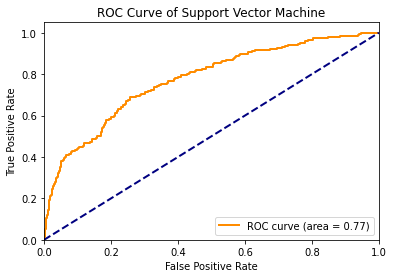

In [8]:
clf = svm.SVC(probability = False, kernel = 'rbf')
clf.fit(x_train,train_y.ravel())

pred_y = clf.predict(x_test)
pred_train = clf.predict(x_train)

Report(train_y,test_y,pred_y,pred_train)

clf = OneVsRestClassifier(svm.SVC(kernel = 'rbf'))
clf.fit(x_train,y_train)
y_score = clf.decision_function(x_test)
plot_ROC(y_test,y_score,'Support Vector Machine')

Training error 0.011375000000000024
Testing error 0.5800000000000001

 Confusion Matrix
 [[ 86   6   5   6   9   0   5  15  43  24]
 [  6  86   2   6   3   5  11  10  18  40]
 [ 18   9  34  13  43  17  31  13   8   3]
 [ 14   7  10  38  35  41  42  20   8  16]
 [  8   2  10   6  99   8  33  18  11   7]
 [  4  14   7  18  20  73  16  20   7  10]
 [  3  11  15   9  33  16 112   6   0   3]
 [  7   9   9   7  33  16  14  64   2  17]
 [ 15  21   2   6   3  11   4   5 136  18]
 [  8  29   2   1   7   7   7   7  16 112]]

 Classification Report
               precision    recall  f1-score   support

           0       0.51      0.43      0.47       199
           1       0.44      0.46      0.45       187
           2       0.35      0.18      0.24       189
           3       0.35      0.16      0.22       231
           4       0.35      0.49      0.41       202
           5       0.38      0.39      0.38       189
           6       0.41      0.54      0.46       208
           7       0.3

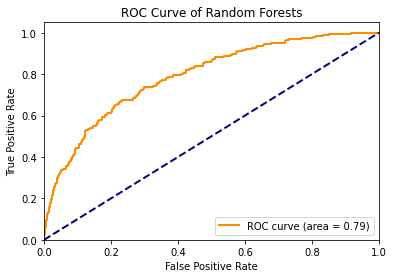

In [9]:
n=12
clf = RandomForestClassifier(max_depth=n ,n_estimators=100, criterion = 'entropy' ,random_state=0)
clf.fit(x_train,train_y.ravel())

pred_y = clf.predict(x_test)
pred_train = clf.predict(x_train)

Report(train_y,test_y,pred_y,pred_train)

clf2 = OneVsRestClassifier(RandomForestClassifier(max_depth=n, n_estimators=100, criterion = 'entropy', random_state = 0))
clf2.fit(x_train,y_train)
y_score = clf2.predict_proba(x_test)
plot_ROC(y_test,y_score,'Random Forests')

Training error 0.0
Testing error 0.7655000000000001

 Confusion Matrix
 [[57 16 17 11 10 14  6 15 33 20]
 [20 43 12 18  5 14  8 24 13 30]
 [17 10 41 24 19 19 23 17  9 10]
 [13 12 23 32 32 30 34 25 17 13]
 [13  8 22 14 56 11 39 15 11 13]
 [13 15 15 28 17 35 21 24 12  9]
 [ 7 11 29 21 32 20 58 18  7  5]
 [12  8 21  9 28 18 17 37  9 19]
 [44 31  7 16 11  7  8 10 60 27]
 [18 29  8 16 10 16 13 16 20 50]]

 Classification Report
               precision    recall  f1-score   support

           0       0.27      0.29      0.28       199
           1       0.23      0.23      0.23       187
           2       0.21      0.22      0.21       189
           3       0.17      0.14      0.15       231
           4       0.25      0.28      0.27       202
           5       0.19      0.19      0.19       189
           6       0.26      0.28      0.27       208
           7       0.18      0.21      0.20       178
           8       0.31      0.27      0.29       221
           9       0.26      0.

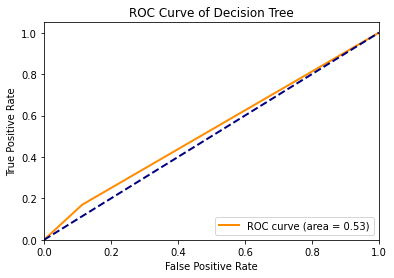

In [10]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,train_y) 

pred_y = clf.predict(x_test)
pred_train = clf.predict(x_train)

Report(train_y,test_y,pred_y,pred_train)

clf3 = OneVsRestClassifier(DecisionTreeClassifier(random_state = 0))
clf3.fit(x_train,y_train)
y_score = clf3.predict_proba(x_test)
plot_ROC(y_test,y_score,'Decision Tree')

In [ ]:
clf = LogisticRegression(random_state=0,max_iter=100000)
clf.fit(x_train,train_y.ravel())

pred_y = clf.predict(x_test)
pred_train = clf.predict(x_train)

Report(train_y,test_y,pred_y,pred_train)

clf4 = OneVsRestClassifier(LogisticRegression(max_iter=100000,random_state=0))
clf4.fit(x_train,y_train)
y_score = clf4.decision_function(x_test)
plot_ROC(y_test,y_score,'Logistic Regression')

In [ ]:
#Support Vector Machine with rbf kernel ML model is best among the given models based on ROC curve analysis.